<h2 style="text-align:center;font-size:200%;;">Лабораторная работа № 1 </h2>
<h3  style="text-align:center;"><span class="label label-success">Разведочный анализ данных с помощью PySpark</span></h3>

<h3>Цель и задачи работы:</h3>
1. Познакомиться с понятием «большие данные» и способами их обработки<br>
2. Познакомиться с инструментом Apache Spark и возможностями, которые он предоставляет для обработки больших данных<br>
3. Получить навыки выполнения разведочного анализа данных использованием pysprk


<h2 style="text-align:center;font-size:200%;;">Ход работы</h2>

In [2]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [3]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
# Укажите путь к CSV файлу
csv_file_path = "archive/1.csv"

# Прочитайте CSV файл в DataFrame
df = spark.read.csv(csv_file_path, header=True, sep=';', inferSchema=True)

col = ['timestamp','site_id','period_id','actual_consumption','actual_pv', 
       'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
       'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09']

df = df[col]
limited_data_pandas = df.limit(10)

limited_data_pandas.toPandas()

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_00,pv_01,pv_02,pv_03,pv_04,pv_05,pv_06,pv_07,pv_08,pv_09
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,18.321836,13.912749,10.946568,9.243136,6.962653,5.466993,4.565274,4.082976,3.851306,3.638564
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,6.339899,4.295642,3.016987,2.314616,2.015446,1.952004,1.893801,1.840635,1.791986,1.747604
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,0.936193,0.403129,0.259490,0.338924,0.411971,0.479376,0.541489,0.598855,0.651823,0.700478
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,0.219761,0.091042,0.184182,0.269820,0.348792,0.421529,0.488656,0.550591,0.607483,0.659699
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,0.143507,0.232756,0.314935,0.390735,0.460637,0.524848,0.583788,0.637915,0.687616,0.733272
5,2014-07-19 22:45:00,1,0,51.790326,0.000000,51.857548,51.891930,51.912236,52.005984,51.929889,...,0.170069,0.257836,0.338463,0.412528,0.480568,0.543071,0.600489,0.653234,0.701688,0.746200
6,2014-07-19 23:00:00,1,0,52.460697,0.000000,52.347502,52.285460,52.333257,52.231521,52.220741,...,0.170069,0.257836,0.338463,0.412528,0.480568,0.543071,0.600489,0.653234,0.701688,0.746200
7,2014-07-19 23:15:00,1,0,51.831117,0.000000,52.024522,52.214861,52.192664,52.226268,52.920358,...,0.170069,0.257836,0.338463,0.412528,0.480568,0.543071,0.600489,0.653234,0.701688,0.746200
8,2014-07-19 23:45:00,1,0,52.030533,0.000000,52.202840,52.344978,53.099632,52.468551,52.493247,...,0.170069,0.257836,0.338463,0.412528,0.480568,0.543071,0.600489,0.653234,0.701688,0.746200
9,2014-07-20 00:00:00,1,0,51.754934,0.000000,51.995633,52.805283,52.204891,52.246713,52.270049,...,0.170069,0.257836,0.338463,0.412528,0.480568,0.543071,0.600489,0.653234,0.701688,0.746200


<h2 style="text-align:center;font-size:200%;;">Поиск пропущеных значений </h2>

In [4]:
from pyspark.sql.functions import col, count, when

# Создаем список с количеством пустых значений в каждой колонке
empty_counts = [count(when(col(c).isNull() | (col(c) == ""), c)).alias("Empty_" + c) for c in df.columns]

# Создаем DataFrame с подсчетом пустых значений
missing_data = df.agg(*empty_counts)

# Преобразуем результат в список строк
result_rows = missing_data.first().asDict()

# Выводим результат в более читаемом формате
for column, count in result_rows.items():
    print(f"{column}: {count}")


Empty_timestamp: 0
Empty_site_id: 0
Empty_period_id: 0
Empty_actual_consumption: 0
Empty_actual_pv: 0
Empty_load_00: 0
Empty_load_01: 0
Empty_load_02: 0
Empty_load_03: 0
Empty_load_04: 0
Empty_load_05: 0
Empty_load_06: 0
Empty_load_07: 0
Empty_load_08: 0
Empty_load_09: 0
Empty_pv_00: 0
Empty_pv_01: 0
Empty_pv_02: 0
Empty_pv_03: 0
Empty_pv_04: 0
Empty_pv_05: 0
Empty_pv_06: 0
Empty_pv_07: 0
Empty_pv_08: 0
Empty_pv_09: 0


<h2 style="text-align:center;font-size:200%;;">Поиск и устранение выбросов</h2>

In [5]:
from pyspark.sql.functions import col

# Define the columns to check for outliers
numeric_columns = ['actual_consumption', 'actual_pv', 
                   'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
                   'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09']

numeric_columns = ['actual_consumption', 'actual_pv']

# Define the outlier removal threshold (adjust as needed)
outlier_threshold = 1.5

# Function to remove outliers using IQR
def remove_outliers(df, column):
    quantiles = df.approxQuantile(column, [0.25, 0.75], 0.01)
    lower_bound = quantiles[0] - outlier_threshold * (quantiles[1] - quantiles[0])
    upper_bound = quantiles[1] + outlier_threshold * (quantiles[1] - quantiles[0])
    
    # Filter and count outliers
    outliers_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
    
    # Remove outliers
    df = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    
    return df, outliers_count

# Remove outliers for each numeric column
outliers_stats = {}
for column in numeric_columns:
    df, outliers_count = remove_outliers(df, column)
    outliers_stats[column] = outliers_count

# Show the cleaned DataFrame
limited_data_pandas = df.limit(10)
print(limited_data_pandas.toPandas())

# Print the outliers statistics
for column, count in outliers_stats.items():
    print(f"Outliers removed for {column}: {count}")



            timestamp  site_id  period_id  actual_consumption  actual_pv  \
0 2014-07-19 18:45:00        1          0           51.625703  22.712489   
1 2014-07-19 19:30:00        1          0           52.281257   6.618605   
2 2014-07-19 20:00:00        1          0           50.719565   1.452209   
3 2014-07-19 20:15:00        1          0           51.901162   0.580877   
4 2014-07-19 21:00:00        1          0           51.250007   0.000000   
5 2014-07-19 22:45:00        1          0           51.790326   0.000000   
6 2014-07-19 23:00:00        1          0           52.460697   0.000000   
7 2014-07-19 23:15:00        1          0           51.831117   0.000000   
8 2014-07-19 23:45:00        1          0           52.030533   0.000000   
9 2014-07-20 00:00:00        1          0           51.754934   0.000000   

     load_00    load_01    load_02    load_03    load_04  ...      pv_00  \
0  52.816828  53.501688  54.079161  52.683472  52.590445  ...  18.321836   
1  51.45279

<h2 style="text-align:center;font-size:200%;;">Типы данных в данных</h2>

In [6]:
data_types_df = pd.DataFrame(df.dtypes, columns=['Column Name', 'Data type'])

# Добавление колонки с типами признаков данных
data_types = []
for col in data_types_df['Data type']:
    if 'timestamp' in col.lower():
        data_types.append('Временной')
    elif 'int' in col.lower() or 'double' in col.lower() or 'float' in col.lower():
        data_types.append('Числовой')
    elif 'string' in col.lower():
        data_types.append('Строковый')
    elif 'boolean' in col.lower():
        data_types.append('Булевый')
    else:
        data_types.append('Неопределенный')

data_types_df['Feature Type'] = data_types

# Вывод типов признаков
print('Columns overview')
print(data_types_df)

Columns overview
           Column Name  Data type Feature Type
0            timestamp  timestamp    Временной
1              site_id        int     Числовой
2            period_id        int     Числовой
3   actual_consumption     double     Числовой
4            actual_pv     double     Числовой
5              load_00     double     Числовой
6              load_01     double     Числовой
7              load_02     double     Числовой
8              load_03     double     Числовой
9              load_04     double     Числовой
10             load_05     double     Числовой
11             load_06     double     Числовой
12             load_07     double     Числовой
13             load_08     double     Числовой
14             load_09     double     Числовой
15               pv_00     double     Числовой
16               pv_01     double     Числовой
17               pv_02     double     Числовой
18               pv_03     double     Числовой
19               pv_04     double     Число

<h2 style="text-align:center;font-size:200%;;">Расчет статистических показателей признаков</h2>

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Создаем Spark сессию
spark = SparkSession.builder.appName("example").getOrCreate()

# Ваши столбцы
columns = ['site_id', 'period_id', 'actual_consumption', 'actual_pv',
           'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
           'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09']

df_to_describe = df[columns]

# Статистика по числовым признакам
numeric_summary = df_to_describe.describe().toPandas().transpose()



numeric_summary

# Рассчитываем квартили для каждой колонки
quantiles = [0.25, 0.5, 0.75]
quantile_results = []

for column in columns:
    quantile_values = df_to_describe.approxQuantile(column, quantiles, 0.01)
    quantile_results.append([column] + quantile_values)

# Преобразуем quantile_results в pandas DataFrame
quantile_df = pd.DataFrame(quantile_results, columns=["Column", "Quantile_25", "Quantile_50", "Quantile_75"])

# Выводим результат
quantile_df

,0,1,2,3,4
summary,count,mean,stddev,min,max
site_id,45510,1.0,0.0,1,1
period_id,45510,24.423379477038015,18.827132732912993,0,58
actual_consumption,45510,68.36571848364419,17.097428196282458,11.154231639848081,129.28679784158822
actual_pv,45510,24.785702390882673,36.99527394532427,0.0,122.71337751330047
load_00,45510,68.36167916502635,16.999083751670245,25.510948650717744,124.95205627353654
load_01,45510,68.3602200146319,16.938360024549368,28.882502173183386,123.16514398332706
load_02,45510,68.35767065934705,16.923087754781164,30.76758595436617,127.02479012291525
load_03,45510,68.35553310706182,16.89908486181691,31.754338032005336,134.44110316308385
load_04,45510,68.35433543195734,16.904601184712682,32.52921192904976,136.48603610161177


,Column,Quantile_25,Quantile_50,Quantile_75
0,site_id,1.000000,1.000000,1.000000
1,period_id,6.000000,23.000000,41.000000
2,actual_consumption,55.360530,58.703264,85.394830
3,actual_pv,0.000000,0.000000,41.479471
4,load_00,55.407486,58.730195,85.507163
5,load_01,55.417069,58.703156,85.562509
6,load_02,55.465281,58.747322,85.568519
7,load_03,55.461533,58.703642,85.587668
8,load_04,55.486854,58.752318,85.524773
9,load_05,55.463000,58.709425,85.537446


<h2 style="text-align:center;font-size:200%;;">Корреляция между actual_consumption и load_00 - load_09</h2>

In [26]:
from pyspark.sql import functions as F

# Выберите только нужные колонки из датафрейма
selected_columns = ['actual_consumption'] + [f'load_{i:02}' for i in range(10)]
data_subset = df.select(selected_columns)

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [('actual_consumption', f'load_{i:02}') for i in range(10)]

# Создайте словарь для хранения результатов корреляции
correlation_dict = {}

# Вычислите корреляцию для каждой пары столбцов и добавьте в словарь
for col1, col2 in column_pairs:
    correlation = data_subset.agg(F.corr(col1, col2).alias('correlation')).collect()[0]['correlation']
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")



Correlation between actual_consumption and load_00: 0.9867298137382069
Correlation between actual_consumption and load_01: 0.9729390688339578
Correlation between actual_consumption and load_02: 0.9502938490190201
Correlation between actual_consumption and load_03: 0.9300355163168271
Correlation between actual_consumption and load_04: 0.9010123457761736
Correlation between actual_consumption and load_05: 0.8745002206761607
Correlation between actual_consumption and load_06: 0.8413173996980522
Correlation between actual_consumption and load_07: 0.8114954930944879
Correlation between actual_consumption and load_08: 0.7762016112348139
Correlation between actual_consumption and load_09: 0.7446122098589749


<h2 style="text-align:center;font-size:200%;;">Корреляция между actual_pv и pv_00 - pv_09</h2>

In [27]:
from pyspark.sql import functions as F

# Выберите только нужные колонки из датафрейма
selected_columns = ['actual_pv'] + [f'pv_{i:02}' for i in range(10)]
data_subset = df.select(selected_columns)

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [('actual_pv', f'pv_{i:02}') for i in range(10)]

# Создайте словарь для хранения результатов корреляции
correlation_dict = {}

# Вычислите корреляцию для каждой пары столбцов и добавьте в словарь
for col1, col2 in column_pairs:
    correlation = data_subset.agg(F.corr(col1, col2).alias('correlation')).collect()[0]['correlation']
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")



Correlation between actual_pv and pv_00: 0.9826554545629347
Correlation between actual_pv and pv_01: 0.955972519984498
Correlation between actual_pv and pv_02: 0.9286761600273495
Correlation between actual_pv and pv_03: 0.8962845100675025
Correlation between actual_pv and pv_04: 0.8589102366373929
Correlation between actual_pv and pv_05: 0.8173871980670429
Correlation between actual_pv and pv_06: 0.772633141244229
Correlation between actual_pv and pv_07: 0.7249722172402228
Correlation between actual_pv and pv_08: 0.6749368220434846
Correlation between actual_pv and pv_09: 0.6231274796634604


<h2 style="text-align:center;font-size:200%;;">Визуализация распределения наиболее важных признаков (actual_consumption)</h2>

<Axes: xlabel='actual_consumption', ylabel='Count'>

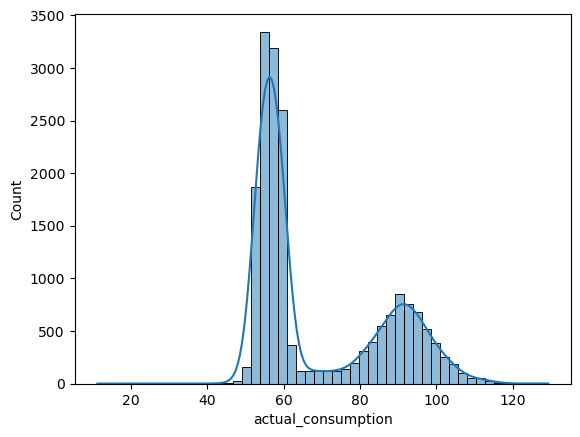

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Создание гистограммы и KDE для признака 'actual_consumption' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_consumption', kde=True)
plt.show()

<h2 style="text-align:center;font-size:200%;;">Визуализация распределения наиболее важных признаков (actual_pv)</h2>

<Axes: xlabel='actual_pv', ylabel='Count'>

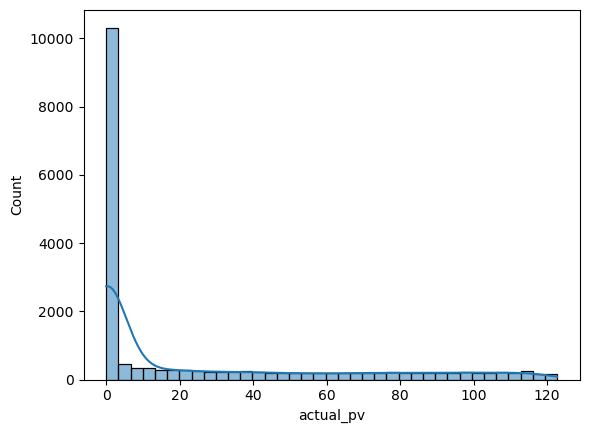

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.sample(fraction=0.4, seed=42).toPandas()

# Создание гистограммы и KDE для признака 'actual_pv' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_pv', kde=True)
plt.show()

<h2 style="text-align:center;font-size:200%;;">Выводы</h2>

В рамках лабораторной работы был проведён разведочный анализ данных с помощью PySpark для датасета исторических данных по фотоэлектричеству и нагрузке.
Была проделана следующая работа:
1. Были определены типы признаков в датасете
2. Были определены и устранены пропущенные значения в датасете
3. Были определены и устранены выбросы в датасете
4. Были расчитаны статистические показатели признаков
5. Были визуализарованны распределения наиболее важных признаков
6. Была определена корреляция между признаками